## VSM E1: Word Mover's Distance

This experiment uses word embeddings, FastText models and WMD to predict scores.

The three primary experiments we need to run are the following.

1. FastText WMD on 6-Class problems. Look at correlations and Stats.
2. FastText WMD in German and Spanish on 6-Class problem.

### Hypotheses

1. WMD should correlate highly with correct answers b/c those answers which are closest to a model answer in n-dimensional space
will tend to be correct.
 
 
### Notes

1. Word Embeddings in Non-English languages are wikipedia DB dumps taken from : https://github.com/Kyubyong/wordvectors

In [2]:
import sys
sys.path.append('../')
sys.path.append('../../../')
import libs.data as data
import libs.stats as stats
import libs.utils as utils
import libs.preprocessing as pp
import exp_libs.vsm as vsm
import pandas as pd
import numpy as np
import gensim
import spacy
from importlib import reload

In [3]:
df_en = data.load_dataframe('../../../datasets/final/en/asag_v2_en_filter.csv')
display(df_en.head(1))
nlp_en = spacy.load('en')

y_true_en = np.round(df_en['Score'].as_matrix())

ID  AID  QID                                             Prompt  \
0  1.1    1    1   What is the role of a prototype program in pr...   

                                                  MA  \
0   To simulate the behaviour of portions of the ...   

                                                 MA2  \
0  to provide an example and feedback of how the ...   

                                                 MA3  \
0  to serve as a proof of concept and illustrate ...   

                               NA  \
0  to find errors or collect data   

                                                  SA  MyScore  \
0   High risk problems are address in the prototy...        4   

           Feedback Feedback_Notes  Score  Class3_Score  Class2_Score  
0  correct_indirect            NaN    3.5             2             1

## Exp. 01: Finding Correlation and Effect of WMD

1. Function = Word Mover's Distance
2. Model = fasttext-wikinews-subwords-300 (FastText)

In [4]:
import gensim.downloader as api
model = api.load('fasttext-wiki-news-subwords-300')

In [9]:
reload(vsm)

tokenizer_fn = vsm.create_processing_fn(nlp_en, pp.EN_STOPS)

def pipeline_fn(sent):
    return ' '.join(tokenizer_fn(sent))


wmd_fn = vsm.create_wmdistance(model)

In [20]:
reload(vsm)
res1 = vsm.run_sent_sim_experiment(df_en,
                                   pipeline_fn,
                                   sim_fn=wmd_fn,
                                   ma_count=1)

In [ ]:
np.corrcoef(res1['y_pred_raw'], y_true_en)

In [26]:
## Store Results
data.save('../tmp/vsm/vsm_e3_wmd_corr', res1)
data.load('../tmp/vsm/vsm_e3_wmd_corr')

{'y_pred': array([2., 2., 1., ..., 9., 2., 5.]),
 'y_pred_raw': array([0.4866762 , 0.42220981, 0.28854734, ..., 1.87858946, 0.36180325,
        1.08904844]),
 'y_pred_raw_all': array([[0.4866762 ],
        [0.42220981],
        [0.28854734],
        ...,
        [1.87858946],
        [0.36180325],
        [1.08904844]])}

## Exp. 02: WM Similarity

$$
WMS(s_{1}, s_{2}) = 1 - (WMD(s_{1}, s_{2})/max(S_{1}, S_{2}))
$$

1. Function WM Similarity
2. Model = wiki-gigaword-300 (Glove Word2Vec)

In [23]:
reload(vsm)
wms_fn = vsm.create_wmsimilarity(model)
res2 = vsm.run_sent_sim_experiment(df_en,
                                   pipeline_fn,
                                   sim_fn=wms_fn,
                                   ma_count=1)

/home/che/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/che/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/che/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


             precision    recall  f1-score   support

        0.0       0.33      0.07      0.12        14
        1.0       0.00      0.00      0.00         8
        2.0       0.67      0.03      0.05       234
        3.0       0.06      0.04      0.05       157
        4.0       0.36      0.89      0.51       676
        5.0       0.74      0.17      0.28       921

avg / total       0.55      0.39      0.31      2010

Pearson's R: 0.2620329476645761
Cohen's Kappa: 0.07769868852532125
MAE: 0.06965174129353234
Accuracy: 38.56%
Precision: 54.52%
Recall: 38.56%
F1-Measure: 31.18%


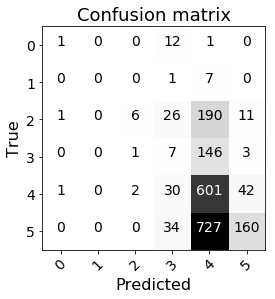

In [24]:
stats.print_all_stats(y_true_en, res2['y_pred'])
stats.plot_confusion_matrix(stats.cm(y_true_en, res2['y_pred']), classes=np.arange(6))

In [25]:
## Store Results
data.save('../tmp/vsm/vsm_e3_wmsimilarity_ma1', res2)
data.load('../tmp/vsm/vsm_e3_wmsimilarity_ma1')

{'y_pred': array([4., 4., 5., ..., 2., 4., 3.]),
 'y_pred_raw': array([0.8377746 , 0.8592634 , 0.90381755, ..., 0.37380351, 0.87939892,
        0.63698385]),
 'y_pred_raw_all': array([[0.8377746 ],
        [0.8592634 ],
        [0.90381755],
        ...,
        [0.37380351],
        [0.87939892],
        [0.63698385]])}

## Exp. 02: Cosine Similarity Between Word Vectors

1. Function Cosine Similarity Between Word Vectors
2. Model = wiki-gigaword-300 (Glove Word2Vec)

In [27]:
reload(vsm)
cosine_sim = vsm.create_vector_cosine_similarity(nlp_en)
res3 = vsm.run_sent_sim_experiment(df_en,
                                   pipeline_fn,
                                   sim_fn=cosine_sim, 
                                   ma_count=1)

In [28]:
np.corrcoef(res3['y_pred_raw'], y_true_en)

array([[1.        , 0.28594453],
       [0.28594453, 1.        ]])

             precision    recall  f1-score   support

        0.0       0.20      0.07      0.11        14
        1.0       0.00      0.00      0.00         8
        2.0       0.36      0.07      0.12       234
        3.0       0.08      0.08      0.08       157
        4.0       0.37      0.64      0.47       676
        5.0       0.61      0.42      0.50       921

avg / total       0.45      0.42      0.41      2010

Pearson's R: 0.27583845380014704
Cohen's Kappa: 0.11472371361049472
MAE: -0.05771144278606965
Accuracy: 42.19%
Precision: 45.46%
Recall: 42.19%
F1-Measure: 40.65%


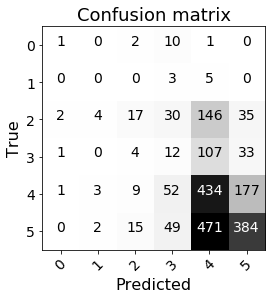

In [29]:
stats.print_all_stats(y_true_en, res3['y_pred'])
stats.plot_confusion_matrix(stats.cm(y_true_en, res3['y_pred']), classes=np.arange(6))

In [30]:
## Store Results
data.save('../tmp/vsm/vsm_e3_cosine_similarity_ma1', res3)
data.load('../tmp/vsm/vsm_e3_cosine_similarity_ma1')

{'y_pred': array([5., 4., 5., ..., 1., 4., 3.]),
 'y_pred_raw': array([0.90345348, 0.83555866, 0.96821397, ..., 0.12507674, 0.81811646,
        0.67811815]),
 'y_pred_raw_all': array([[0.90345348],
        [0.83555866],
        [0.96821397],
        ...,
        [0.12507674],
        [0.81811646],
        [0.67811815]])}

### Exp 01-03: N-Gram Summary

1. WMD / WM Similarity has greater precision at lower recalls.
2. Vector Cosine Comparison has lower precision but overall better recall (is more lenient, lets more through) 

## Exp. 08: Cross-Language Comparison
1. Function = WMD
2. Model Answer Count = 1
3. Language = Spanish
4. Model = wiki-300 (Word2Vec Spanish)

In [31]:
df_es = data.load_dataframe('../../../datasets/final/es/asag_v2_es_filter.csv')
display(df_es.head(1))
nlp_es = spacy.load('es')
y_true_es = np.round(df_es['Score'].as_matrix())

ID  AID  QID                                             Prompt  \
0  1.1    1    1  ¿Cuál es el papel de un programa prototipo en ...   

                                                  MA  \
0  Para simular el comportamiento de porciones de...   

                                                 MA2  \
0  para proporcionar un ejemplo y retroalimentaci...   

                                                 MA3  \
0  para servir como prueba de concepto e ilustrar...   

                                         NA  \
0  para encontrar errores o recopilar datos   

                                                  SA  MyScore  \
0  Los problemas de alto riesgo se abordan en el ...        4   

           Feedback Feedback_Notes  Score  Class3_Score  Class2_Score  
0  correct_indirect            NaN    3.5             2             1

In [32]:
model_es = vsm.load_fasttext_saved('../../../vector_models/small_models/es/fast_text/spanish')

In [35]:
tokenizer_es_fn = vsm.create_processing_fn(nlp_es, pp.ES_STOPS)

def pipeline_es_fn(sent):
    return ' '.join(tokenizer_es_fn(sent))


wmd_es_fn = vsm.create_wmdistance(model_es)

In [36]:
res8 = vsm.run_sent_sim_experiment(df_es,
                                   pipeline_es_fn,
                                   sim_fn=wmd_es_fn,
                                   ma_count=1)

In [37]:
np.corrcoef(res8['y_pred_raw'], y_true_es)

array([[ 1.        , -0.31817727],
       [-0.31817727,  1.        ]])

In [39]:
## Store Results
data.save('../tmp/vsm/vsm_e3_wmd_corr_es', res8)
data.load('../tmp/vsm/vsm_e3_wmd_corr_es')

{'y_pred': array([ 4.,  3.,  3., ..., 18.,  7.,  9.]),
 'y_pred_raw': array([0.74558605, 0.64211425, 0.60049327, ..., 3.52512455, 1.40415689,
        1.78162471]),
 'y_pred_raw_all': array([[0.74558605],
        [0.64211425],
        [0.60049327],
        ...,
        [3.52512455],
        [1.40415689],
        [1.78162471]])}

## Exp. 09: Cross-Language Comparison (Language = Spanish)
1. Function = WMS
2. Model Answer Count = 1
3. Language = Spanish
4. Model = wiki-300 (Word2Vec Spanish)

In [40]:
reload(vsm)
wms_es_fn = vsm.create_wmsimilarity(model_es)
res9 = vsm.run_sent_sim_experiment(df_es,
                                   pipeline_es_fn,
                                   sim_fn=wms_es_fn,
                                   ma_count=1)

             precision    recall  f1-score   support

        0.0       0.25      0.14      0.18        14
        1.0       0.00      0.00      0.00         8
        2.0       0.28      0.13      0.18       234
        3.0       0.10      0.50      0.16       157
        4.0       0.32      0.49      0.39       676
        5.0       0.76      0.04      0.08       921

avg / total       0.50      0.24      0.20      2010

Pearson's R: 0.27911009422073524
Cohen's Kappa: 0.02361545532639775
MAE: 0.6368159203980099
Accuracy: 23.73%
Precision: 49.87%
Recall: 23.73%
F1-Measure: 20.13%


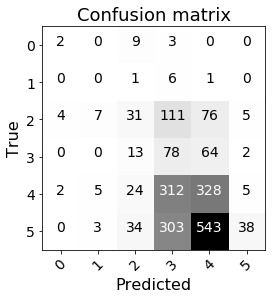

In [42]:
stats.print_all_stats(y_true_en, res9['y_pred'])
stats.plot_confusion_matrix(stats.cm(y_true_en, res9['y_pred']), classes=np.arange(6))

In [43]:
## Store Results
data.save('../tmp/vsm/vsm_e3_wmsimilarity_ma1_es', res9)
data.load('../tmp/vsm/vsm_e3_wmsimilarity_ma1_es')

{'y_pred': array([4., 4., 4., ..., 0., 3., 2.]),
 'y_pred_raw': array([0.75147132, 0.78596192, 0.79983558, ..., 0.        , 0.5319477 ,
        0.4061251 ]),
 'y_pred_raw_all': array([[0.75147132],
        [0.78596192],
        [0.79983558],
        ...,
        [0.        ],
        [0.5319477 ],
        [0.4061251 ]])}

## Exp. 10: Cross-Language Comparison (Language = Spanish)
1. Function = Cosine Similarity
2. Model Answer Count = 1
3. Language = Spanish
4. Model = wiki-300 (Word2Vec Spanish)

In [44]:
reload(vsm)
cosine_es_fn = vsm.create_vector_cosine_similarity(nlp_es)
res10 = vsm.run_sent_sim_experiment(df_es,
                                   pipeline_es_fn,
                                   sim_fn=cosine_es_fn,
                                   ma_count=1)

             precision    recall  f1-score   support

        0.0       0.14      0.07      0.10        14
        1.0       0.00      0.00      0.00         8
        2.0       0.28      0.12      0.17       234
        3.0       0.10      0.21      0.13       157
        4.0       0.35      0.61      0.44       676
        5.0       0.62      0.22      0.32       921

avg / total       0.44      0.34      0.33      2010

Pearson's R: 0.264957315056894
Cohen's Kappa: 0.062438936245763466
MAE: 0.2915422885572139
Accuracy: 33.73%
Precision: 44.20%
Recall: 33.73%
F1-Measure: 32.75%


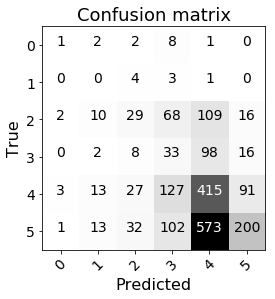

In [45]:
stats.print_all_stats(y_true_en, res10['y_pred'])
stats.plot_confusion_matrix(stats.cm(y_true_en, res10['y_pred']), classes=np.arange(6))

In [46]:
data.save('../tmp/vsm/vsm_e3_cosine_similarity_ma1_es', res10)
data.load('../tmp/vsm/vsm_e3_cosine_similarity_ma1_es')

{'y_pred': array([4., 4., 4., ..., 2., 4., 3.]),
 'y_pred_raw': array([0.76945212, 0.79867622, 0.88409229, ..., 0.34385397, 0.7319275 ,
        0.57703645]),
 'y_pred_raw_all': array([[0.76945212],
        [0.79867622],
        [0.88409229],
        ...,
        [0.34385397],
        [0.7319275 ],
        [0.57703645]])}

## Exp. 11: Cross-Language Comparison (Language = German)
1. Function = WMD
2. Model Answer Count = 1
3. Language = German
4. Model = wiki-300 (FastText German)

In [47]:
df_de = data.load_dataframe('../../../datasets/final/de/asag_v2_de_filter.csv')
display(df_de.head(1))
nlp_de = spacy.load('de')
y_true_de = np.round(df_de['Score'].as_matrix())

model_de = vsm.load_fasttext_saved('../../../vector_models/small_models/de/fast_text/german')

pipeline_de_fn = vsm.create_processing_fn(nlp_de, pp.DE_STOPS)
wmd_de_fn = vsm.create_wmdistance(model_de)

ID  AID  QID                                             Prompt  \
0  1.1    1    1  Welche Rolle spielt ein Prototyp-Programm bei ...   

                                                  MA  \
0  Um das Verhalten von Teilen des gewünschten So...   

                                                 MA2  \
0  um ein Beispiel und Feedback zur Funktionsweis...   

                                                 MA3  \
0  als Konzeptnachweis dienen und veranschauliche...   

                                          NA  \
0  um Fehler zu finden oder Daten zu sammeln   

                                                  SA  MyScore  \
0  In dem Prototyp-Programm werden Probleme mit h...        4   

           Feedback Feedback_Notes  Score  Class3_Score  Class2_Score  
0  correct_indirect            NaN    3.5             2             1

In [48]:
res11 = vsm.run_sent_sim_experiment(df_de,
                                   pipeline_de_fn,
                                   sim_fn=wmd_de_fn,
                                   ma_count=1)

In [49]:
np.corrcoef(res11['y_pred_raw'], y_true_de)

array([[ 1.        , -0.31354206],
       [-0.31354206,  1.        ]])

In [50]:
## Store Results
data.save('../tmp/vsm/vsm_e3_wmd_corr_de', res11)
data.load('../tmp/vsm/vsm_e3_wmd_corr_de')

{'y_pred': array([19., 16.,  6., ..., 15., 15., 18.]),
 'y_pred_raw': array([3.70802591, 3.20448303, 1.27145645, ..., 3.        , 3.08820202,
        3.63763246]),
 'y_pred_raw_all': array([[3.70802591],
        [3.20448303],
        [1.27145645],
        ...,
        [3.        ],
        [3.08820202],
        [3.63763246]])}

## Exp. 12: Cross-Language Comparison (Language = German)
1. Function = WMS
2. Model Answer Count = 1
3. Language = German
4. Model = wiki-300 (FastText German)

In [51]:
wms_de_fn = vsm.create_wmsimilarity(model_de)
res12 = vsm.run_sent_sim_experiment(df_de,
                                   pipeline_de_fn,
                                   sim_fn=wms_de_fn,
                                   ma_count=1)

             precision    recall  f1-score   support

        0.0       0.01      1.00      0.02        14
        1.0       0.00      0.00      0.00         8
        2.0       0.02      0.01      0.01       234
        3.0       0.03      0.01      0.01       157
        4.0       0.06      0.00      0.00       676
        5.0       0.75      0.01      0.03       921

avg / total       0.37      0.01      0.02      2010

Pearson's R: 0.20274785409722146
Cohen's Kappa: -0.0039225578608816924
MAE: 3.798507462686567
Accuracy: 1.49%
Precision: 36.88%
Recall: 1.49%
F1-Measure: 1.51%


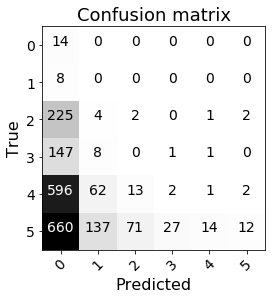

In [52]:
stats.print_all_stats(y_true_de, res12['y_pred'])
stats.plot_confusion_matrix(stats.cm(y_true_de, res12['y_pred']), classes=np.arange(6))

In [53]:
## Store Results
data.save('../tmp/vsm/vsm_e3_wmsimilarity_ma1_de', res11)
data.load('../tmp/vsm/vsm_e3_wmsimilarity_ma1_de')

{'y_pred': array([19., 16.,  6., ..., 15., 15., 18.]),
 'y_pred_raw': array([3.70802591, 3.20448303, 1.27145645, ..., 3.        , 3.08820202,
        3.63763246]),
 'y_pred_raw_all': array([[3.70802591],
        [3.20448303],
        [1.27145645],
        ...,
        [3.        ],
        [3.08820202],
        [3.63763246]])}

## Exp. 13: Cross-Language Comparison (Language = German)
1. Function = Cosine Vector
2. Model Answer Count = 1
3. Language = German
4. Model = wiki-300 (FastText German)

In [55]:
cosine_de_fn = vsm.create_vector_cosine_similarity(nlp_de)
res13 = vsm.run_sent_sim_experiment(df_de,
                                   pipeline_de_fn,
                                   sim_fn=cosine_de_fn,
                                   ma_count=1)

TypeError: Argument 'string' has incorrect type (expected str, got list)

In [ ]:
stats.print_all_stats(y_true_de, res13['y_pred'])
stats.plot_confusion_matrix(stats.cm(y_true_de, res13['y_pred']), classes=np.arange(6))

In [ ]:
## Store Results
data.save('../tmp/vsm/vsm_e3_cosine_similarity_ma1_de', res13)
data.load('../tmp/vsm/vsm_e3_cosine_similarity_ma1_de')